In [1]:
from vax_concerns_classifiers import RelevanceBaseline, print_report
import os
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

LOCAL_DIR = os.path.join(os.path.dirname(os.path.abspath(os.getcwd())), 'bert_classifier')
TEST_PATH = os.path.join(LOCAL_DIR, '..', '..', 'data', 'test', 'ann_combo.csv')

In [2]:
test_df = pd.read_csv(TEST_PATH)
test_texts = test_df["paragraph_content"].to_list()
test_labels = [int(x) for x in test_df["new_annotations"].to_list()]

In [3]:
relevance_baseline = RelevanceBaseline()
relevance_baseline.load_model(LOCAL_DIR, 'baseline')

/Users/christopherli/anaconda3/envs/vax_trends/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


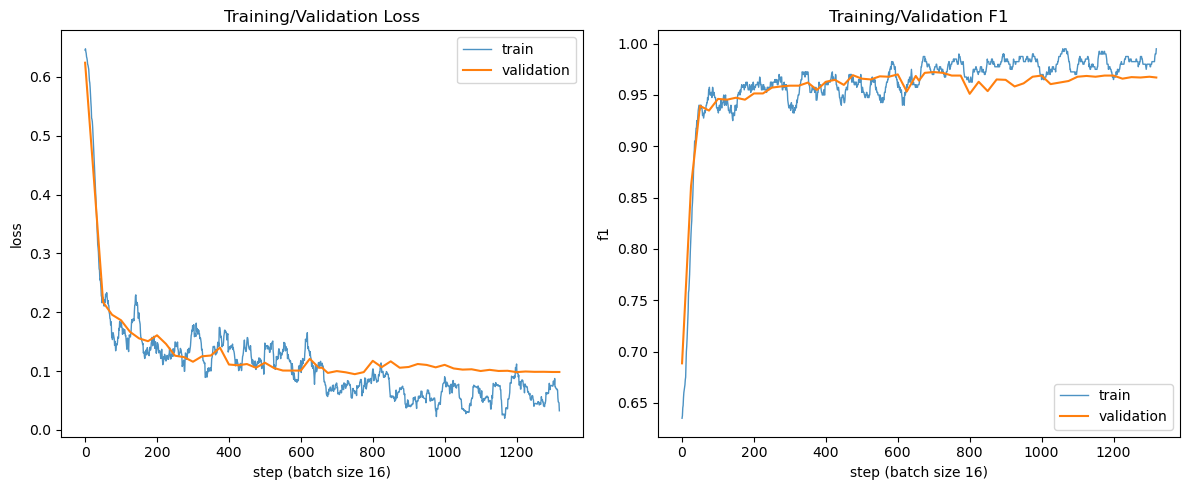

In [4]:
relevance_baseline.plot_history(['loss', 'f1'])

100%|██████████| 32/32 [02:14<00:00,  4.21s/it]

Precision: 95.43650793650794%
Recall: 95.43650793650794%
f1: 95.43650793650794%
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       181
           1       0.97      0.96      0.96       323

    accuracy                           0.95       504
   macro avg       0.95      0.95      0.95       504
weighted avg       0.95      0.95      0.95       504



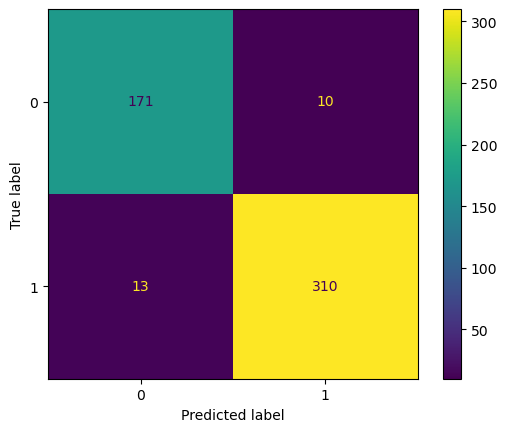

Accuracy: 0.9543650793650794
Precision: 0.96875
Recall: 0.9597523219814241
F1: 0.9642301710730948


In [5]:
predictions = relevance_baseline.predict(test_texts)
print_report(test_labels, predictions)

cm = confusion_matrix(test_labels, predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f'Accuracy: {accuracy_score(test_labels, predictions)}')
print(f'Precision: {precision_score(test_labels, predictions)}')
print(f'Recall: {recall_score(test_labels, predictions)}')
print(f'F1: {f1_score(test_labels, predictions)}')